<a href="https://colab.research.google.com/github/456258zaq/2024_1_Deeplearning/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D%EA%B0%9C%EB%A1%A0_%EC%A4%91%EA%B0%84%EA%B3%BC%EC%A0%9C_%EC%9D%B4%EB%B3%91%ED%9B%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import requests
import pandas as pd
import numpy as np

# Tiger 코스피 # 기준날짜 : 5월 2일
list_df = [] # 데이터프레임 저장용 리스트 생성
for i in range(1,100): #100페이지까지 조회
  url = f"https://finance.naver.com/item/sise_day.naver?code=277630&page={i}" # 조회용 url 생성
  page = requests.get(url,headers={"User-Agent":
  "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36"}) # request를 위한 header등 셋팅
  list_df.append(pd.read_html(page.text)[0]) # 데이터프레임 리스트에 밀어넣기

In [41]:
Tiger_Kospi_df = pd.concat(list_df) # 데이터 만들기
Tiger_Kospi_df.head() # 날짜 기준 ~ 24년 5월 2일까지의 데이터

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024.05.02,27735.0,하락 95,27700.0,27810.0,27625.0,1270.0
2,2024.04.30,27830.0,상승 115,27775.0,27970.0,27775.0,7649.0
3,2024.04.29,27715.0,상승 250,27650.0,27730.0,27540.0,2954.0
4,2024.04.26,27835.0,상승 270,27770.0,27890.0,27675.0,8969.0


In [42]:
Tiger_Kospi_df.dropna(inplace=True) # 인덱스 내 Null 값 제거 (보통 거래일이 없는 경우)
Tiger_Kospi_df.set_index("날짜",inplace=True) # 날짜를 index 로
Tiger_Kospi_df.drop(columns=["전일비"],inplace=True) # 전일비의 데이터는 삭제

(990, 5)


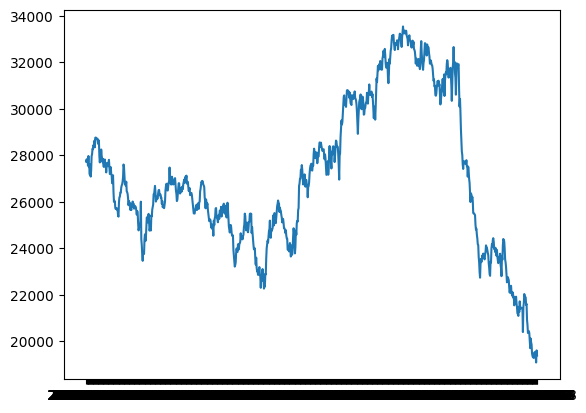

In [43]:
import matplotlib.pyplot as plt # 시각화용 라이브러리
print(Tiger_Kospi_df.shape)
plt.plot(Tiger_Kospi_df["종가"]) # 종가에 대한 예측을 진행할 예정

In [39]:
# 시계열 예측을 위한 모델은 통계적 모델 중 AR, MA, ARMA, ARIMA 등 다양하게 존재함
# 그 외의 딥러닝 계열에서는 RNN, LSTM, GRU, Transformer 등이 존재하며, CNN 활용한 모델 등 다양한 모델들이 있음
# 다만 차이점은 딥러닝의 경우, 장기시계열의 예측이 좋은 경우가 존재하며, ARIMA의 경우 장기예측에서 성능이 떨어지는 경우가 존재함
# 우선, 통계 대표 모델인 ARIMA 의 장기시계열을 예측하여 비교하고 (단변량)
# LSTM 을 기반으로한 장기시계열 예측 (다변량)
# Transformer를 기반으로 한 장기 시계열 예측 (다변량)으로 진행할 계획임

In [40]:
# ARIMA 모델은 과거에 p,q,d 라는 하이퍼파라미터는 직접 수정하면서 테스트 해야 했음
# 참조 : https://dong-guri.tistory.com/9
# p는 AR 모델의 하이퍼 파라미터
# d는 MA 모델의 하이퍼 파라미터
# q는 I 모델의 하이퍼 파라미터임

# AR은 얼마나 전의 데이터를 참고하여, 현재의 기준점을 반영할 것인지에 대한 파라미터
# MA는 이동 평균 (window 방식으로 평균을 내는 방법임)
# I는 차분을 통하여, 데이터의 정상성을 만들고 이를 기반으로 통계모델에 사용할 수 있도록 적합하는 방법임



In [44]:
train_df = Tiger_Kospi_df.iloc[:int(len(Tiger_Kospi_df)*0.8)] # train Set
test_df = Tiger_Kospi_df.iloc[int(len(Tiger_Kospi_df)*0.8):] # test Set

In [45]:
# auto arima 모델 사용
# 출처 : https://assaeunji.github.io/statistics/2021-09-08-arimapdq/